## Курсовая работа по курсу "Теория и практика компьютерного моделирования"

### Тема "Дискретно-событийное моделирование"
#### Выполнил: студент группы М80-203М-19 Бобряков А.С.

## Теоретическая часть

**Дискретно-событийное моделирование (DES)** — это вид имитационного моделирования.

### 1. Иммитационное моделирование

**Имитационное моделирование (ситуационное моделирование)** — метод, позволяющий строить модели, описывающие процессы так, как они проходили бы в действительности, использующий методы теорий систем и сетей массового обслуживания, в которых рассматриваются различные модели входных, выходных потоков и правил обслуживания, построенных на базе соответствующих законов распределения случайных величин и процессов.


**Основа дискретно-событийного моделирования** - состояния системы изменяются под воздействием некоторых событий, в общем случае безотносительно к их точной привязке к временной шкале. Существенными являются лишь факты возникновения этих событий и взаимодействие их между собой, то есть синхронизация.

#### 1.1 Разница между дискретно-событийным моделированием и другими методами моделирования 

Динамика большинства моделируемых систем описывается уравнениями с начальными условиями t > 0:  

<img src="img/1.jpg">

u(t) – вход,    
x(t) – состояние,    
y(t) – выход     
То есть есть факт составления множества состояний моделируемой системы, а если принять, что множество таких состояний равно n, а множество входных сигналов равно m, то получается, что необходимо моделировать n уравнений состояний и k выходных уравнений системы:

<img src="img/2.jpg">
То есть изменение состояний динамической системы в таких случаях моделирования всегда привязано ко времени, какими бы его измерениями мы ни пользовались, непрерывными или дискретными.  

В **дискретно-событийном моделировании** важен факт фиксации события (или группы событий), а в какое время, либо интервал времени, либо через какой промежуток времени эти события фиксируются, уже не столь важно.

<img src="img/3.jpg">

Верхний график - пространство состояний непрерывной системы    
Средний график - пространство состояний дискретной системы    
Нижний график - пространство состояний **дискретно-событийной системы**

S1...Sn - состояния системы    
e1...em - события системы    
Формируется последовательность пар (время-состояние):    
<img src="img/4.jpg">

### 2. Дискретно-событийное моделирование

<ins>***Определение: Модель дискретно-событийной системы***</ins> представляет собой кортеж:    
<img src="img/5.jpg">    
X – конечное множество, пространство состояний системы;    
E – конечное множество событий;    
f – функция смены состояний,   
Г – конечное множество активных (и исполняемых в текущий момент) событий;    
x0 – начальное состояние.  

При динамической смене состояний системы может происходить возврат к предыдущим состояниям, поэтому моделирование пространства состояний будет составлять при упорядочении по хронологии цепочек событий     
    
Дополнение модельными часами:   
<img src="img/6.jpg">    
V - модельные часы
vik - время жизни (продолжительность) события

Таким образом очень существенная задача - формирование списков событий (пар время-состояние), в зависимости от которых выделяют **событийно-ориентированное и процессно-ориентированное исполнение событий**

#### 2.1  Событийно-ориентированное моделирование в дискретно-событийной системе

<img src="img/7.jpg">    

**Суть** - Обработчик устанавливает начальное время, инициализирует список событий и в цикле, выбирая следующее событие, переустанавливает модельные часы, проверяя, чтобы не было превышения максимально допустимого времени моделирования, вызывает обработку события.

#### 2.2  Процессно-ориентированное моделирование в дискретно-событийной системе

<img src="img/8.jpg">    

Основным отличием данного вида от предыдущего является не только возможность объединять процессы в группы, но и планировать переключение между процессами, разделяя при этом совместные ресурсы моделируемой системы.

## Практическая часть

### 1. Описание задачи

***Задача*** - Смоделировать нагрузку больницы при заболевании пациентов    

***Полное описание*** - Для заданной больницы наблюдаем нагрузку при заражении людей в районе, который больница обслуживает. В ресурсах больницы присутствуют скорые бригады, свободные койки для госпитализированных пациентов, врачи для первоначального диагноза внутри самой больницы. Врач может отправить пациента домой, либо оставить на лечение. Количество больных в очереди перед осмотром ограничено.  

***Цель моделирования*** - Ответить на вопросы: Как количество бригад, врачей влияет на ожидание приезда бригады, ожидание осмотра в больнице? Провести моделирование для различных параметров системы, распределений.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import pylab
from SimPy.Simulation import *
from sklearn.preprocessing import normalize
import random

random.seed(56)
np.random.seed(56)

<img src="img/9.jpg">    

In [114]:
# Постоянные параметры
cars_number = 12  # количество бригад скорой помощи
doctors_number = 15  # количество докторов, через которое проходят пациенты при приезде
beds_number = 1000  # количество коек для больных пациентов
queue_number = 15  # количество мест в очереди
need_for_bed = 0.7  # вероятность того, что пациент нуждается в койке для лечения в больнице

time_modeling = 14  # количество дней моделирования
two_week = 60*24*time_modeling  # количество минут моделирования

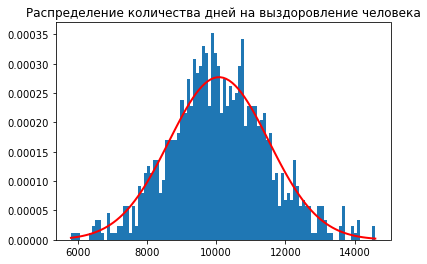

Min days = 4.0 Max days = 10.0


In [115]:
# Распределние для количества дней на выздоровление человека 
time_recovery_mu, time_recovery_sigma = 60*24*7, 60*24 # мин, среднее и среднеквадратичное отклонение
s = np.random.normal(time_recovery_mu, time_recovery_sigma, 1000)
count, bins, ignored = plt.hist(np.around(s), 100, density=True)
plt.plot(bins, 1/(time_recovery_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - time_recovery_mu)**2 / (2 * time_recovery_sigma**2) ),
         linewidth=2, color='r')
plt.title(u"Распределение количества дней на выздоровление человека")
plt.show()
print 'Min days =', np.around(np.min(s)/60/24), "Max days =", np.around(np.max(s)/60/24)

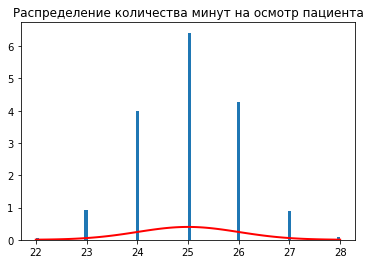

Min minutes = 22.0 Max minutes = 28.0


In [116]:
# Распределние для количества минут на осмотр пациента 
time_inspection_doctor_mu, time_inspection_doctor_sigma = 25, 1 # мин, среднее и среднеквадратичное отклонение
s = np.random.normal(time_inspection_doctor_mu, time_inspection_doctor_sigma, 1000)
count, bins, ignored = plt.hist(np.around(s), 100, density=True)
plt.plot(bins, 1/(time_inspection_doctor_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - time_inspection_doctor_mu)**2 / (2 * time_inspection_doctor_sigma**2) ),
         linewidth=2, color='r')
plt.title(u"Распределение количества минут на осмотр пациента")
plt.show()
print 'Min minutes =', np.around(np.min(s)), "Max minutes =", np.around(np.max(s))

Min minutes time_to_pitient = 2.0 Max minutes time_to_pitient = 13.0
Min minutes time_inspection_car = 2.0 Max minutes time_inspection_car = 8.0
Min minutes time_to_hospital = 5.0 Max minutes time_to_hospital = 12.0


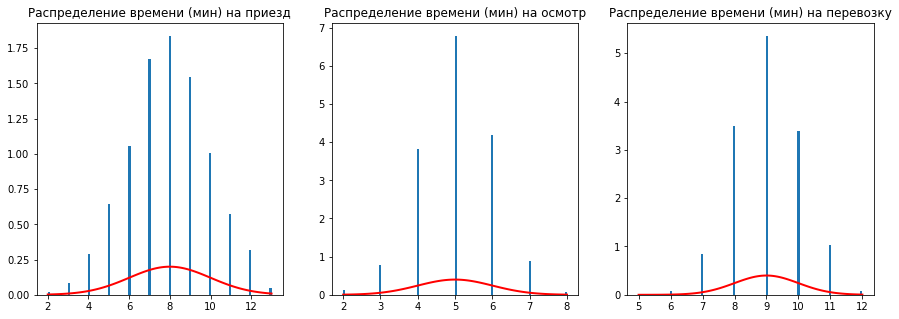

In [119]:
# Распределние для количества минут для бригады на приезд/осмотр/транспортировку
gs = gridspec.GridSpec(1, 3)
plt.figure(num=None, figsize=(15, 5))

# приезд
time_to_pitient_mu, time_to_pitient_sigma = 8, 2 # мин, среднее и среднеквадратичное отклонение
s = np.random.normal(time_to_pitient_mu, time_to_pitient_sigma, 1000)
ax = plt.subplot(gs[0, 0]) # row 0, col 0
count, bins, ignored = plt.hist(np.around(s), 100, density=True)
plt.plot(bins, 1/(time_to_pitient_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - time_to_pitient_mu)**2 / (2 * time_to_pitient_sigma**2) ),
         linewidth=2, color='r')
plt.title(u"Распределение времени (мин) на приезд")
print 'Min minutes time_to_pitient =', np.around(np.min(s)), "Max minutes time_to_pitient =", np.around(np.max(s))

# осмотр
time_inspection_car_mu, time_inspection_car_sigma = 5, 1 # мин, среднее и среднеквадратичное отклонение
s = np.random.normal(time_inspection_car_mu, time_inspection_car_sigma, 1000)
ax = plt.subplot(gs[0, 1]) # row 0, col 0
count, bins, ignored = plt.hist(np.around(s), 100, density=True)
plt.plot(bins, 1/(time_inspection_car_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - time_inspection_car_mu)**2 / (2 * time_inspection_car_sigma**2) ),
         linewidth=2, color='r')
plt.title(u"Распределение времени (мин) на осмотр")
print 'Min minutes time_inspection_car =', np.around(np.min(s)), "Max minutes time_inspection_car =", np.around(np.max(s))

# транспортировка
time_to_hospital_mu, time_to_hospital_sigma = 9, 1 # мин, среднее и среднеквадратичное отклонение
s = np.random.normal(time_to_hospital_mu, time_to_hospital_sigma, 1000)
ax = plt.subplot(gs[0, 2]) # row 0, col 0
count, bins, ignored = plt.hist(np.around(s), 100, density=True)
plt.plot(bins, 1/(time_to_hospital_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - time_to_hospital_mu)**2 / (2 * time_to_hospital_sigma**2) ),
         linewidth=2, color='r')
plt.title(u"Распределение времени (мин) на перевозку")
print 'Min minutes time_to_hospital =', np.around(np.min(s)), "Max minutes time_to_hospital =", np.around(np.max(s))

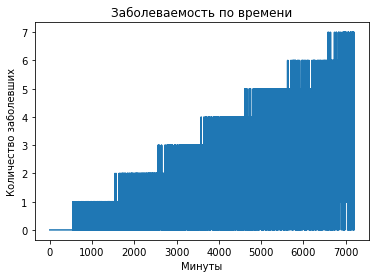

In [123]:
# Зависимость количества вызовов врача каждую следующую минуту
times = np.arange(two_week)  # минуты
def get_inspected_by_times(times):
    result = []
    for t in times:
        result.append(np.around(random.uniform(0, times[t])/(two_week/20)))
    return result
infected_by_times = get_inspected_by_times(times)

to = 60*24*5  # n дней на графике
plt.title(u"Заболеваемость по времени")
plt.xlabel(u"Минуты")
plt.ylabel(u"Количество заболевших")
plt.plot(times[:to], infected_by_times[:to])

### 2. Моделирование

In [124]:
# Метрики
waiting_doctor = Monitor(name='Ожидание доктора в очереди', ylab='y', tlab='t')
waiting_car = Monitor(name='Ожидание бригады врачей', ylab='y', tlab='t')
waiting_bed = Monitor(name='Ожидание койки при заболевании', ylab='y', tlab='t')

In [125]:
# Запуск моделирования
def start_modeling():
    # Класс пациента
    class Infected(Process):
        def __init__(self, i):
            Process.__init__(self, name="Infected" + str(i))
            self.i = i

        def go(self):
            # print(now(), self.i, "Call car")
            start_wait_car = now()
            yield request, self, cars  # запрос на ресурс бригады (встаем в очередь)
            # print(now(), self.i, "Car arrived")
            end_wait_car = now()
            waiting_car.observe(end_wait_car-start_wait_car)
            yield hold, self, np.around(np.random.normal(time_to_pitient_mu, time_to_pitient_sigma)).astype(int) + \
                              np.around(np.random.normal(time_inspection_car_mu, time_inspection_car_sigma)).astype(int) + \
                              np.around(np.random.normal(time_to_hospital_mu, time_to_hospital_sigma)).astype(int)
            # до освобождения машины запрашиваем разрешение встать в очередь к врачу
            yield request, self, queue
            yield release, self, cars

            start_wait_doctor = now()
            # print(now(), self.i, "Awaiting a doctor's examination")
            yield request, self, doctors  # запрос на ресурс доктора (встаем в очередь)
            yield release, self, queue
            end_wait_doctor = now()
            waiting_doctor.observe(end_wait_doctor-start_wait_doctor)
            # print(now(), self.i, "The doctor began an examination")
            yield hold, self, np.around(np.random.normal(time_inspection_doctor_mu, time_inspection_doctor_sigma)).astype(int)

            if(np.random.random_sample() > need_for_bed):
                yield release, self, doctors
                # Идем лечиться в больницу
                # print(now(), self.i, "sent to bed for treatment")
                start_wait_bed = now()
                yield request, self, beds
                # print(now(), self.i, "got a bed for treatment")
                end_wait_bed = now()
                waiting_bed.observe(end_wait_bed-start_wait_bed)
                yield hold, self, np.around(np.random.normal(time_recovery_mu, time_recovery_sigma)).astype(int)  # распределние для дней выздоровления
                yield release, self, beds
                # print(now(), self.i, "recovered")
            else:
                # print(now(), self.i, "sent home for treatment")
                yield release, self, doctors
    
    # Расписание вызывания бригад
    class Schedule(Process):
        def execute(self):
            infected_id = 0
            for time in times[:10000]:
                if (infected_by_times[time] > 0):
                    # создаем все вызовы врачей в эту минуту
                    for infected_people_in_current_time in range(np.array(infected_by_times).astype(int)[time]):
                        infected = Infected(infected_id)
                        infected_id += 1
                        activate(infected,infected.go(),at=float(time))  # Активация приводит к планированию события
            yield hold, self, 0.0
            
    # Ресурсы
    doctors = Resource(capacity=doctors_number, name='Doctors', unitName='doctor', monitored=True, monitorType=Monitor)
    cars = Resource(capacity=cars_number, name='Cars', unitName='car', monitored=True, monitorType=Monitor)
    beds = Resource(capacity=beds_number, name='Beds', unitName='bed', monitored=True, monitorType=Monitor)
    queue = Resource(capacity=queue_number, name='Queue', unitName='place', monitored=True, monitorType=Monitor)

    waiting_doctor.reset()
    waiting_car.reset()
    waiting_bed.reset()
    
    initialize() 
    s = Schedule()
    activate(s, s.execute()) 
    simulate(until=two_week)

# Графики ожидания ресурсов
def print_waiting_resources():
    gs = gridspec.GridSpec(1, 3)
    plt.figure(num=None, figsize=(18, 8))
    
    ax = plt.subplot(gs[0, 0])
    plt.xlabel(u"Минуты (временная шкала)")
    plt.ylabel(u"Ожидание осмотра доктором")
    plt.plot(waiting_doctor.tseries()[:], waiting_doctor.yseries()[:])
    if ((np.where(np.array(waiting_doctor.yseries())[:] > 0))[0].size == 0):
        print("Ожидание осмотра доктором всегда 0 минут")
    else: 
        s = u"Ожидание осмотра доктором > 0 минут начинается с " + \
            str(waiting_doctor.tseries()[np.around(np.where(np.array(waiting_doctor.yseries())[:] > 0)[0][0]/60/24).astype(int)]/64/24) + u" дней"
        print(s)
    
    ax = plt.subplot(gs[0, 1])
    plt.xlabel(u"Минуты (временная шкала)")
    plt.ylabel(u"Ожидание приезда бригады")
    plt.plot(waiting_car.tseries()[:], waiting_car.yseries()[:])
    if ((np.where(np.array(waiting_car.yseries())[:] > 0))[0].size == 0):
        print("Ожидание приезда бригады всегда 0 минут")
    else:
        s = u"Ожидание приезда бригады > 0 минут начинается с " + \
            str(waiting_car.tseries()[np.around(np.where(np.array(waiting_car.yseries())[:] > 0)[0][0]).astype(int)]/60/24) + u" дней"
        print(s)
   
    ax = plt.subplot(gs[0, 2])
    plt.xlabel(u"Минуты (временная шкала)")
    plt.ylabel(u"Ожидание свободной койки")
    plt.plot(waiting_bed.tseries()[:], waiting_bed.yseries()[:])
    if ((np.where(np.array(waiting_bed.yseries())[:] > 0))[0].size == 0):
        print("Ожидание свободной койки всегда 0 минут")
    else: 
        s = u"Ожидание свободной койки > 0 минут начинается с " + \
            str(waiting_bed.tseries()[np.around(np.where(np.array(waiting_bed.yseries())[:] > 0)[0][0]).astype(int)]/60/24) + u" дней"
        print(s)
    
    

#### 2.1 Влияние количества докторов на систему 

Ожидание осмотра доктором > 0 минут начинается с 0.37109375 дней
Ожидание приезда бригады > 0 минут начинается с 0.515277777778 дней
Ожидание свободной койки всегда 0 минут


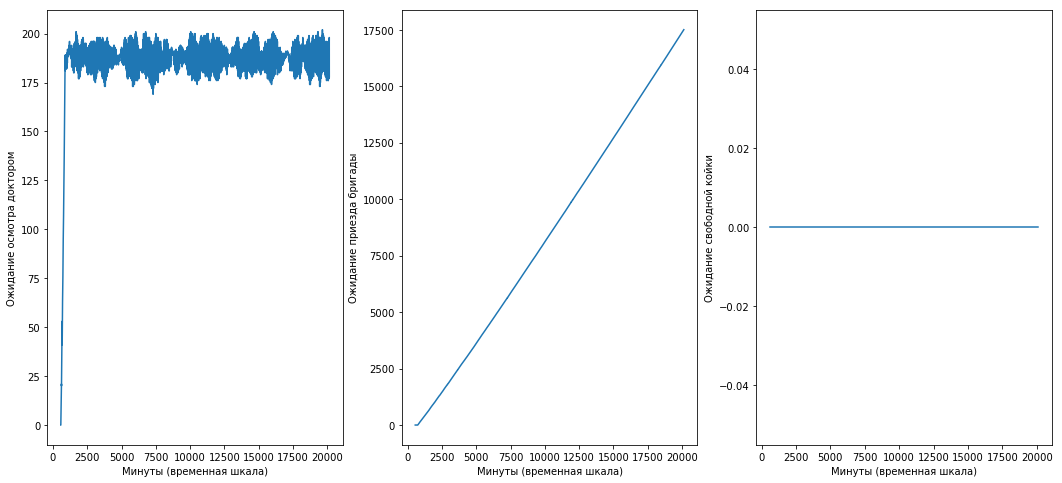

In [127]:
doctors_number = 2
cars_number = 12
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором > 0 минут начинается с 0.371744791667 дней
Ожидание приезда бригады > 0 минут начинается с 0.525694444444 дней
Ожидание свободной койки > 0 минут начинается с 5.69027777778 дней


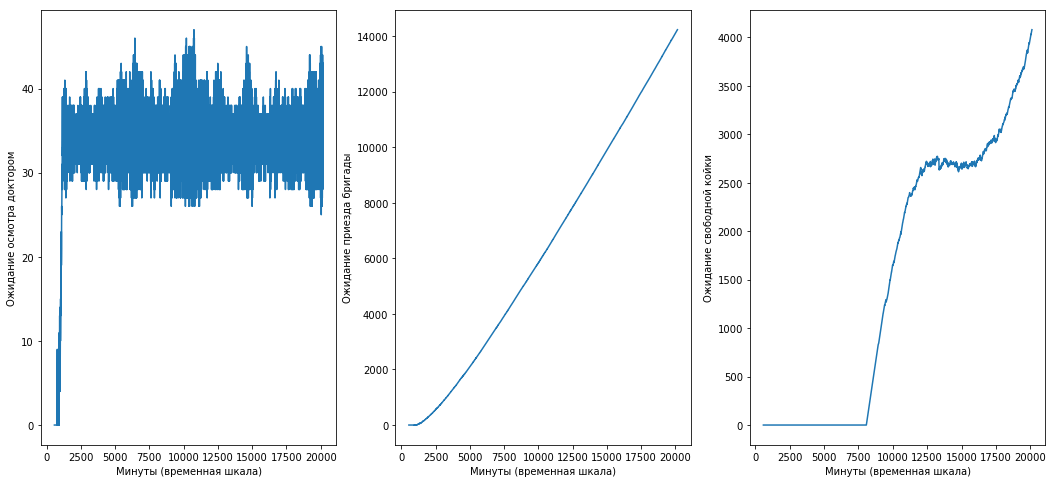

In [128]:
doctors_number = 11
cars_number = 12
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором > 0 минут начинается с 0.369791666667 дней
Ожидание приезда бригады > 0 минут начинается с 0.626388888889 дней
Ожидание свободной койки > 0 минут начинается с 5.69305555556 дней


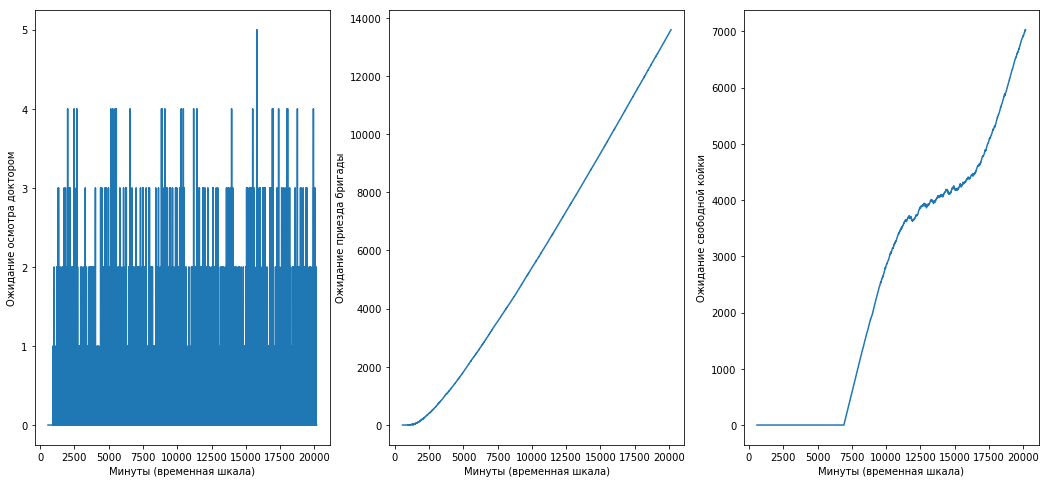

In [129]:
doctors_number = 15
cars_number = 12
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором всегда 0 минут
Ожидание приезда бригады > 0 минут начинается с 0.525 дней
Ожидание свободной койки > 0 минут начинается с 5.69791666667 дней


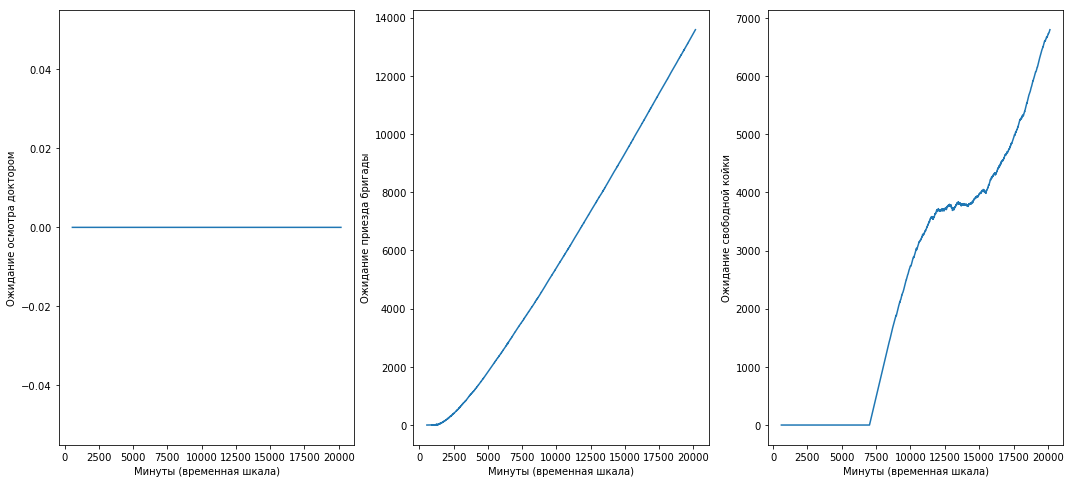

In [131]:
doctors_number = 20
start_modeling()
print_waiting_resources()

#### 2.2 Влияние количества бригад на систему 

Ожидание осмотра доктором всегда 0 минут
Ожидание приезда бригады > 0 минут начинается с 0.392361111111 дней
Ожидание свободной койки всегда 0 минут


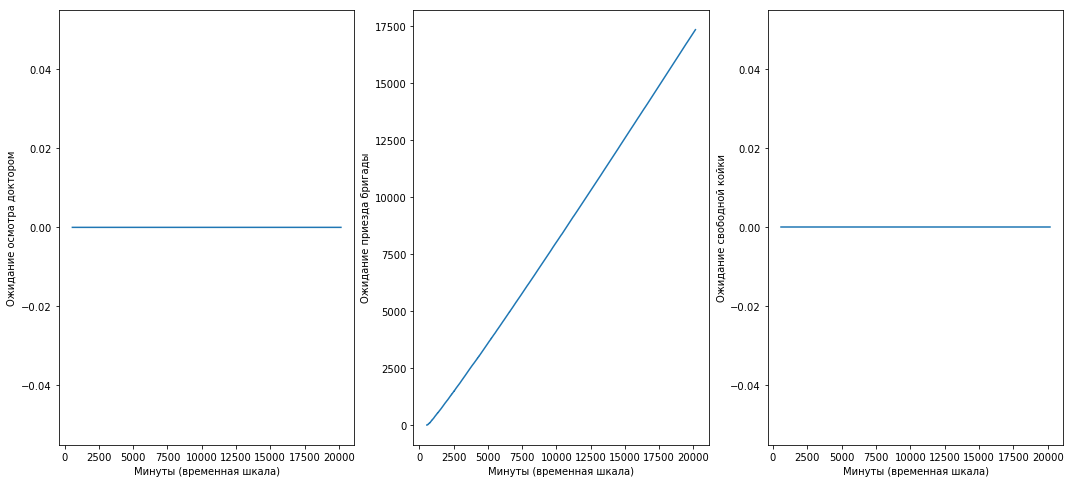

In [133]:
doctors_number = 15
cars_number = 2
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором > 0 минут начинается с 0.371744791667 дней
Ожидание приезда бригады > 0 минут начинается с 0.51875 дней
Ожидание свободной койки > 0 минут начинается с 5.41736111111 дней


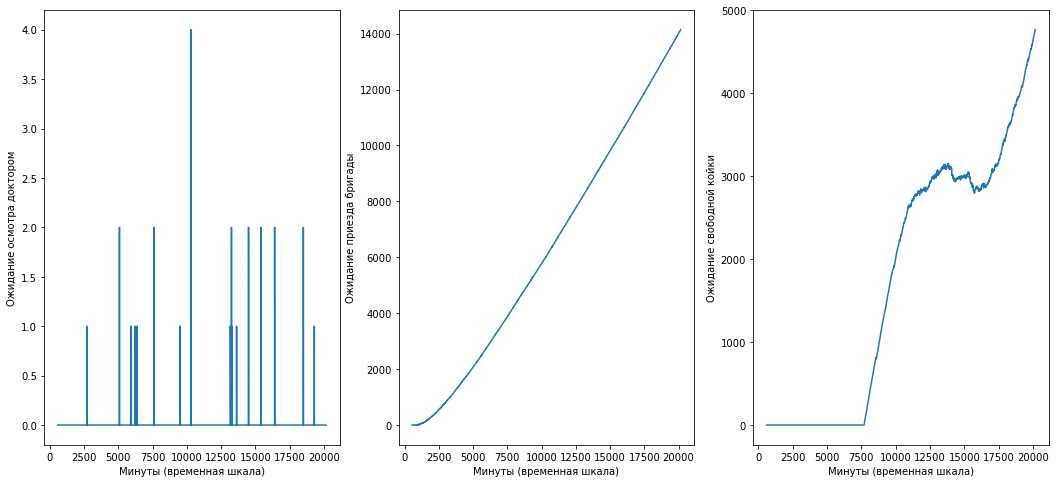

In [134]:
doctors_number = 15
cars_number = 10
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором > 0 минут начинается с 0.37109375 дней
Ожидание приезда бригады > 0 минут начинается с 0.739583333333 дней
Ожидание свободной койки > 0 минут начинается с 5.61666666667 дней


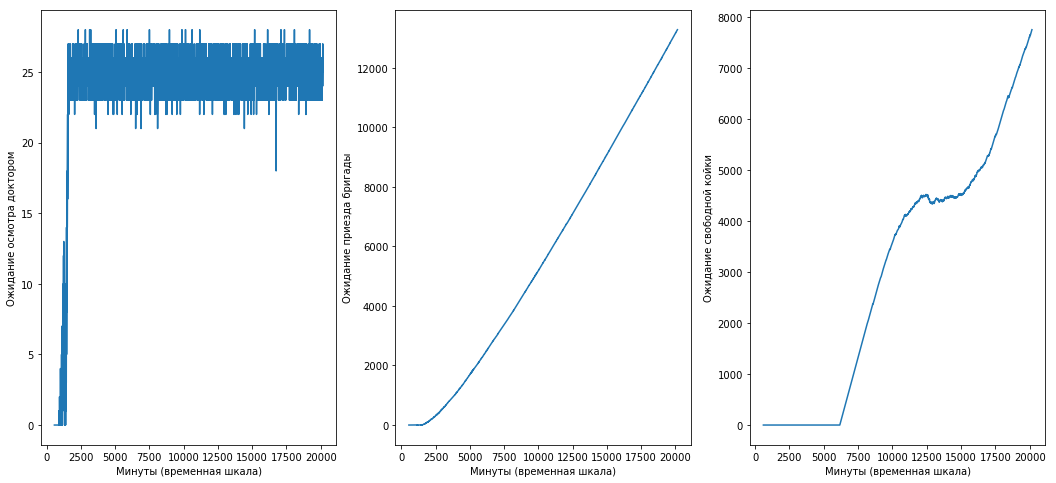

In [135]:
doctors_number = 15
cars_number = 15
start_modeling()
print_waiting_resources()

Ожидание осмотра доктором > 0 минут начинается с 0.370442708333 дней
Ожидание приезда бригады > 0 минут начинается с 1.94166666667 дней
Ожидание свободной койки > 0 минут начинается с 5.17986111111 дней


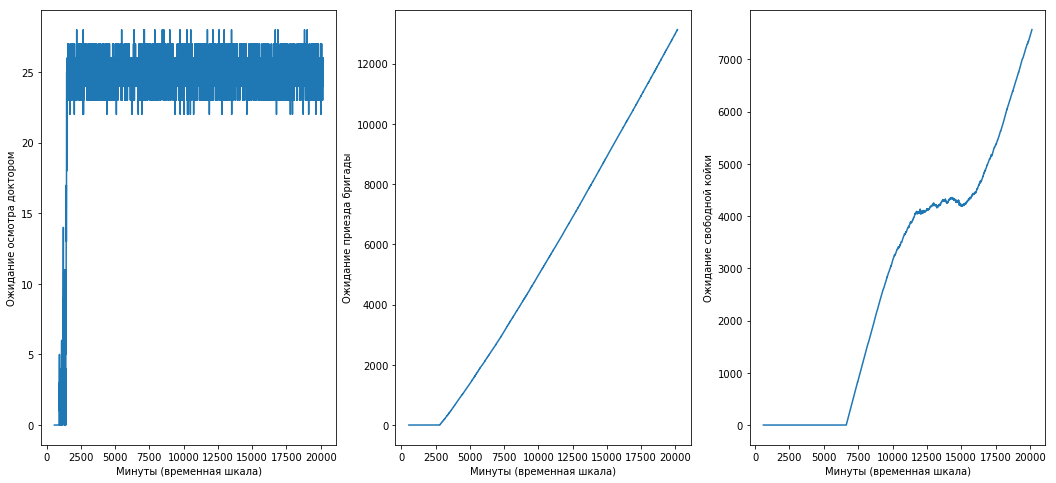

In [136]:
doctors_number = 15
cars_number = 555
start_modeling()
print_waiting_resources()

In [137]:
cars_number = 12

#### 2.3 Диапазон константных параметров

In [42]:
cars_number = 12  # количество бригад скорой помощи
doctors_number = 15  # количество докторов, через которое проходят пациенты при приезде
queue_number = 15  # количество мест в очереди

wait_doctors_all = range(1, 25)
wait_doctors_mean = []
for doctors_number_iteration in wait_doctors_all:
    doctors_number = doctors_number_iteration
    start_modeling()
    wait_doctors_mean.append(waiting_doctor.mean())

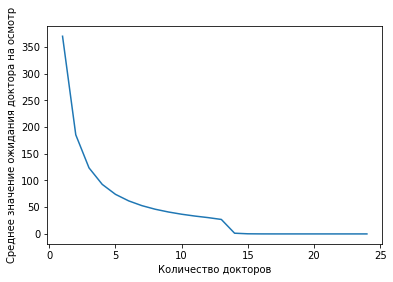

In [46]:
plt.xlabel(u"Количество докторов")
plt.ylabel(u"Среднее значение ожидания доктора на осмотр")
plt.plot(wait_doctors_all, wait_doctors_mean)

In [141]:
cars_number = 12  # количество бригад скорой помощи
doctors_number = 15  # количество докторов, через которое проходят пациенты при приезде
queue_number = 15  # количество мест в очереди

wait_cars_all = [1, 3, 5, 8, 10, 13, 15, 20, 25, 30, 50, 100, 200, 500]
wait_cars_mean = []
for cars_number_iteration in wait_cars_all:
    cars_number = cars_number_iteration
    start_modeling()
    wait_cars_mean.append(waiting_car.mean())

5375.60146477946


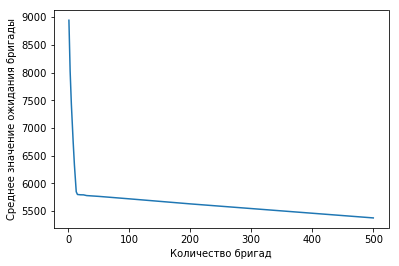

In [144]:
plt.xlabel(u"Количество бригад")
plt.ylabel(u"Среднее значение ожидания бригады")
plt.plot(wait_cars_all, wait_cars_mean)
print(np.min(wait_cars_mean))

In [92]:
cars_number = 12  # количество бригад скорой помощи
doctors_number = 15  # количество докторов, через которое проходят пациенты при приезде

wait_doctors_all = range(1, 25)
wait_doctors_mean = []
wait_cars_all = range(1, 25)
wait_cars_mean = []
for doctors_number_iteration in wait_doctors_all:
    for cars_number_iteration in wait_cars_all:
        doctors_number = doctors_number_iteration
        cars_number = cars_number_iteration
        start_modeling()
        wait_cars_mean.append(waiting_car.mean())
        wait_doctors_mean.append(waiting_doctor.mean())

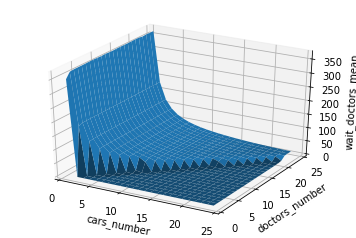

In [99]:
wait_doctors_all_grid, wait_cars_all_grid = np.meshgrid(wait_doctors_all, wait_cars_all)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('cars_number')
ax.set_ylabel('doctors_number')
ax.set_zlabel('wait_doctors_mean')
ax.plot_surface(wait_cars_all_grid, wait_doctors_all_grid, np.array(wait_doctors_mean).reshape((24, 24)))
plt.show()

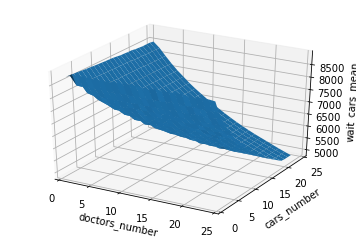

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('doctors_number')
ax.set_ylabel('cars_number')
ax.set_zlabel('wait_cars_mean')
surf = ax.plot_surface(wait_cars_all_grid, wait_doctors_all_grid, np.array(wait_cars_mean).reshape((24, 24)))
plt.show()